In [1]:
import numpy as np
import itertools
from main_training_individual_model import DQN, dqn_loss, show_rewards
from Models.cnn import SMCNN
from Models.fully_connected import SMNNModel
from Models.gru import SMGRU
from Models.lstm import SMLSTM
from Models.prototypical_rnn import ProtoSMRNN

import matplotlib
import matplotlib.pyplot as plt


In [78]:
models = [
    {"title": "Short memory LSTM Rewards", "model_type": SMLSTM, "memory_size": 20,
     "model_kwargs": {"name": "LSTM"}, },
    {"title": "Short memory GRU Rewards", "model_type": SMGRU, "memory_size": 20,
     "model_kwargs": {"name": "GRU"}, },
    {"title": "Prototypical short memory RNN Rewards", "model_type": ProtoSMRNN, "memory_size": 20,
     "model_kwargs": {"name": "RNN"}, },
    {"title": "Short memory space CNN Rewards", "model_type": SMCNN, "memory_size": 20,
     "model_kwargs": {"permute": False, "name": "space_CNN"}, },
    #{"title": "Short memory temporal CNN Rewards", "model_type": SMCNN, "memory_size": 20,
    # "model_kwargs": {"permute": True, "name": "temporal_CNN"},
    # },
    {"title": "Short memory NN Rewards", "model_type": SMNNModel, "memory_size": 1,
     "model_kwargs": {"name": "NN"},
     }]
envs = ["LunarLander-v2", "Acrobot-v1", "CartPole-v1"]

In [109]:
results = {}
for _env in envs:
    print("=========")
    print(_env)
    print("=========")
    results[_env] = {}
    for l in range(len(models)):
        m = models[l]
        model_name = m["model_kwargs"]["name"]
        history = np.load("Experiments/test_results_models/"+model_name+"_"+_env+".npy")
        
        results[_env][model_name] = history
        print(model_name,  f"mean: {np.mean(history):.2f}, std: {np.std(history):.2f}")
print()

# ensemble
for _env in envs:
    results[_env]["Ensemble_norm"] = np.load("Experiments/test_results_ensembles/ensemble_norm_5models_"+_env+".npy")
    results[_env]["Ensemble_attn"] = np.load("Experiments/test_results_ensembles/attn_ensemble_"+_env+".npy")

LunarLander-v2
LSTM mean: 212.09, std: 119.03
GRU mean: 247.11, std: 36.67
RNN mean: 179.64, std: 106.18
space_CNN mean: 200.15, std: 75.65
NN mean: 280.80, std: 16.27
Acrobot-v1
LSTM mean: -91.52, std: 23.08
GRU mean: -110.03, std: 21.64
RNN mean: -90.06, std: 42.51
space_CNN mean: -94.91, std: 24.58
NN mean: -81.84, std: 16.12
CartPole-v1
LSTM mean: 103.02, std: 2.97
GRU mean: 112.12, std: 8.84
RNN mean: 206.16, std: 62.35
space_CNN mean: 68.00, std: 22.62
NN mean: 500.00, std: 0.00



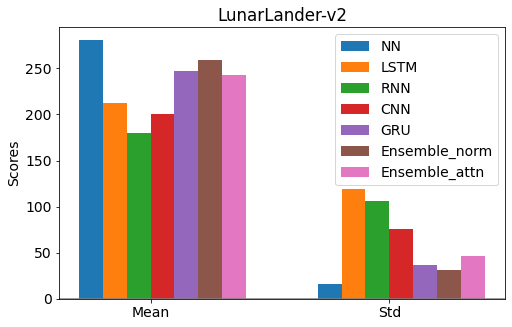

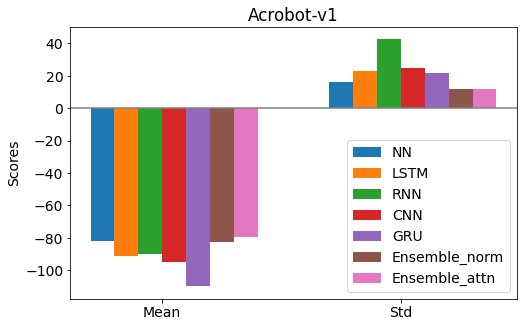

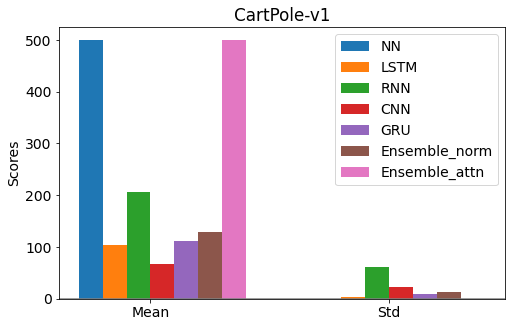

In [113]:

def show_bar_plot(env_name):
    labels = ['Mean', 'Std']
    DQN_means = [np.mean(results[env_name]["NN"]), np.std(results[env_name]["NN"])]
    LSTM_means = [np.mean(results[env_name]["LSTM"]), np.std(results[env_name]["LSTM"])]
    Proto_SMRNN = [np.mean(results[env_name]["RNN"]), np.std(results[env_name]["RNN"])]
    space_CNN = [np.mean(results[env_name]["space_CNN"]), np.std(results[env_name]["space_CNN"])]
    GRU = [np.mean(results[env_name]["GRU"]), np.std(results[env_name]["GRU"])]
    #Ensemble_means = [np.mean(results[env_name]["Ensemble"]), np.std(results[env_name]["Ensemble"])]
    Ensemble_norm_means = [np.mean(results[env_name]["Ensemble_norm"]), np.std(results[env_name]["Ensemble_norm"])]
    Ensemble_attn_means = [np.mean(results[env_name]["Ensemble_attn"]), np.std(results[env_name]["Ensemble_attn"])]


    matplotlib.rcParams.update({'font.size': 14})
    x = np.arange(len(labels))  # the label locations
    width = 0.10  # the width of the bars

    fig, ax = plt.subplots(figsize=(8,5))

    rects1 = ax.bar(x - width*2.5, DQN_means, width, label='NN')
    rects2 = ax.bar(x - 1.5*width, LSTM_means, width, label='LSTM')
    rects3 = ax.bar(x - .5*width, Proto_SMRNN, width, label='RNN')
    rects4= ax.bar(x + width*0.5, space_CNN, width, label='CNN')
    rects4= ax.bar(x + width*1.5, GRU, width, label='GRU')
    rects5= ax.bar(x + width*2.5, Ensemble_norm_means, width, label='Ensemble_norm')
    rects5= ax.bar(x + width*3.5, Ensemble_attn_means, width, label='Ensemble_attn')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(env_name)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    plt.axhline(y=0, color='gray', linestyle='-')
    #ax.grid(axis='y')
    plt.savefig("results_"+env_name)
    
for _env in envs:
    show_bar_plot(_env)

In [73]:
from evaluate_models import load_model
import gym
from utils import set_random_seed
from Ensemble.attn_ensemble import *
models = [
    {"title": "Short memory LSTM Rewards", "model_type": SMLSTM, "memory_size": 20,
     "model_kwargs": {"name": "LSTM"}, },
    {"title": "Short memory GRU Rewards", "model_type": SMGRU, "memory_size": 20,
     "model_kwargs": {"name": "GRU"}, },
    {"title": "Prototypical short memory RNN Rewards", "model_type": ProtoSMRNN, "memory_size": 20,
     "model_kwargs": {"name": "RNN"}, },
    {"title": "Short memory space CNN Rewards", "model_type": SMCNN, "memory_size": 20,
     "model_kwargs": {"permute": False, "name": "space_CNN"}, },
    #{"title": "Short memory temporal CNN Rewards", "model_type": SMCNN, "memory_size": 20,
    # "model_kwargs": {"permute": True, "name": "temporal_CNN"},
    # },
    {"title": "Short memory NN Rewards", "model_type": SMNNModel, "memory_size": 1,
     "model_kwargs": {"name": "NN"},
     },
    # {"title": "Short memory Quantum NN Rewards", "model_type": SMQNNModel, "memory_size": 20,
    #  "model_kwargs": {"nb_qubits": 2, "nb_q_layer": 2, "hidden_dim": 2, "n_hidden_layers": 2},
    #  },
]
seed = 40
print(envs[2])
_env = envs[2]
env = gym.make(_env)
set_random_seed(env, seed)
l = len(models)
for ensemble in itertools.combinations(models, l):
    list_models = []
    model_use_memory = []
    for m in ensemble:
        print(m["model_kwargs"]["name"])
        #print(m["model_kwargs"]["name"])
        weights_path = "trained_models/"+m["model_kwargs"]["name"] + "_" + _env + ".weights"

        list_models.append(load_model(m["model_type"], weights_path, env, m["memory_size"], model_kwargs=m["model_kwargs"]))
        model_use_memory.append(m["memory_size"]>0)
    actions = list(range(env.action_space.n))
    attn_fusion = Fusion_network(list_models, 
                                 len(actions),
                                 env.observation_space.shape[0],
                                 len(list_models))
    attn_ensemble = Attention_ensemble(actions,
                                       list_models,
                                       network=attn_fusion,
                    optimizer=torch.optim.Adam(attn_fusion.parameters(), lr=0),
                    loss_function=dqn_loss)

attn_ensemble.load_weights("trained_models/ensemble_attn_"+_env+".weights")

CartPole-v1
LSTM
GRU
RNN
space_CNN
NN


In [18]:
from copy import deepcopy  # NEW

In [74]:
def evaluate_memory_models(model, environment, memory_size=20, test_episodes=100):
    steps_done = 0
    episodes_done = 0
    R_episodes = []
    verbose_interval = 10
    render_interval = 10
    times = []
    models_contributions = []
    for _ in range(test_episodes):
        frame = environment.reset()
        state = np.zeros((memory_size, *environment.observation_space.shape))
        state[-1] = frame

        terminal = False
        R_episode: float = 0.0
        while not terminal:

            a = model.get_action(state)
            
            models_contributions.append(model.network.last_attn.numpy())
            next_frame, r, terminal, _ = environment.step(a)

            next_state = np.vstack([np.delete(deepcopy(state), obj=0, axis=0), next_frame])
            state = next_state
            steps_done += 1

            R_episode += r
        episodes_done += 1
        R_episodes.append(R_episode)
        if episodes_done % verbose_interval == 0:
            print(f"episode: {episodes_done}, R: {R_episode:.2f},"
                  f" R_mean: {np.mean(R_episodes):.2f}", f"std: {np.std(R_episodes):.2f}", f"{np.mean(times)} sec/pred")
        if episodes_done % render_interval == 0 and episodes_done > 0:
            show_rewards(R_episodes, block=False)
    return R_episodes, models_contributions

episode: 10, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


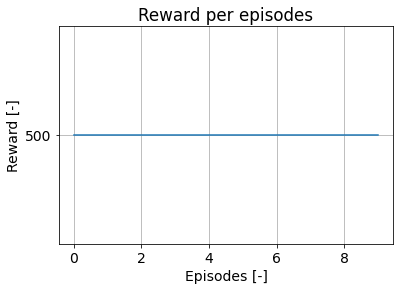

episode: 20, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


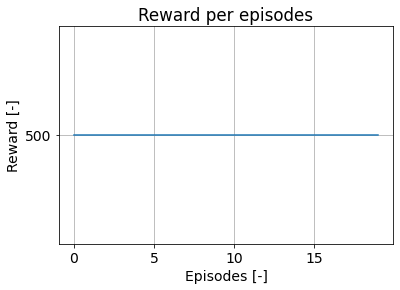

episode: 30, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


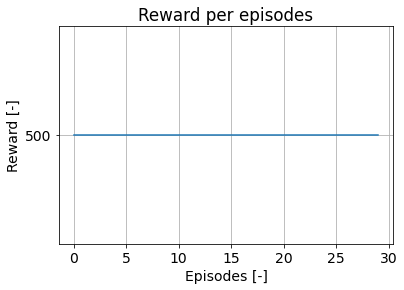

episode: 40, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


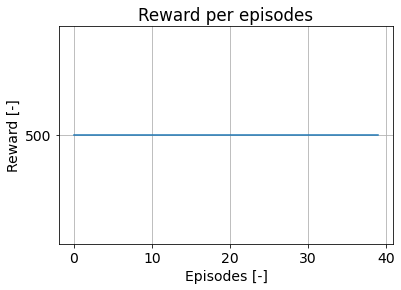

episode: 50, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


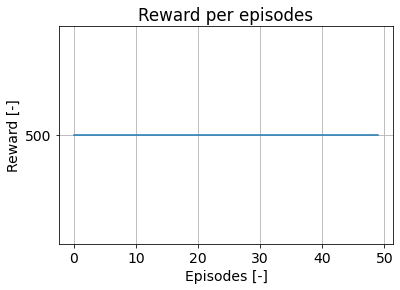

episode: 60, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


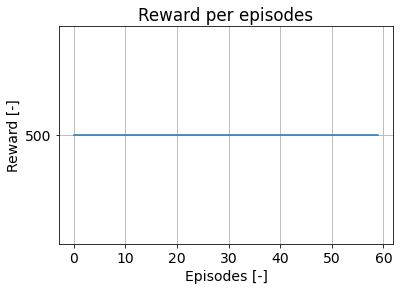

episode: 70, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


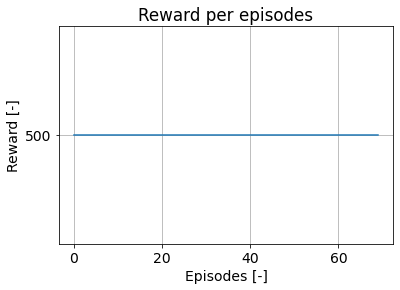

episode: 80, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


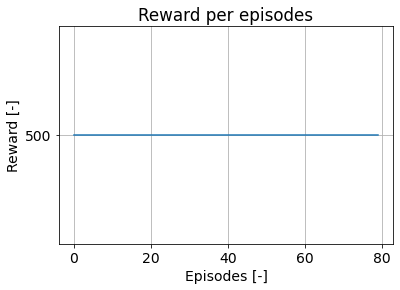

episode: 90, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


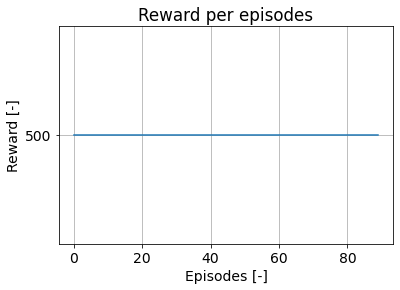

episode: 100, R: 500.00, R_mean: 500.00 std: 0.00 nan sec/pred


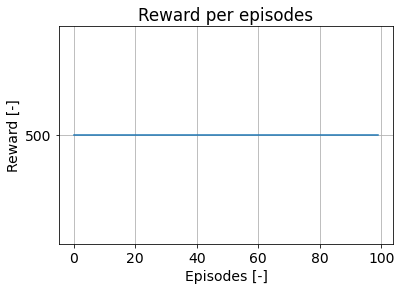

In [75]:
R, model_contributions = evaluate_memory_models(attn_ensemble, env, test_episodes=100)

In [50]:
np.mean(np.array(model_contributions), axis=0)

array([[0.01123806, 0.1792001 , 0.05689974, 0.264253  , 0.48839867]],
      dtype=float32)

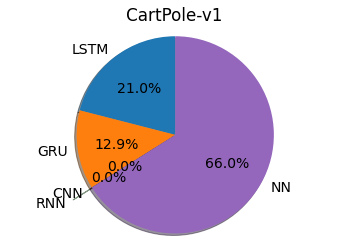

In [77]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'LSTM', 'GRU', 'RNN', 'CNN', 'NN'
sizes = np.mean(np.array(model_contributions), axis=0)[0]
explode = (0, 0., 0.2, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
plt.title(_env)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()
plt.savefig(_env)